# PCA


- step1. normalization
- step2. covariance matrix
- step3. eigen stuff (eigen vector, eigen - value)
- step4. principa component
- step5. reconstructing the original data

#### check eigen value and vector

### Data Set

```
x = np.array([170, 174, 172, 176, 168, 166])
y = np.array([68, 80, 79, 86, 60, 61])
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([170, 174, 172, 176, 168, 166])
y = np.array([68, 80, 79, 86, 60, 61])

### step1. Normalization




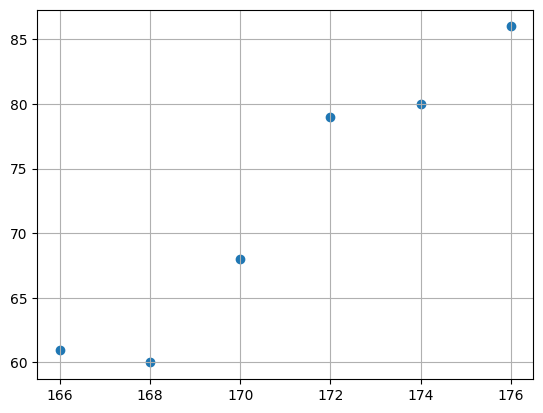

In [2]:
plt.scatter(x, y)
plt.grid(True)
plt.show()

In [10]:
data = np.column_stack((x, y))
print('numpy array of height and weigth')
print(data)

data_mean = np.mean(data, axis=0)
print('\nnumpy array of data mean : height, weight')
print(data_mean)

numpy array of height and weigth
[[170  68]
 [174  80]
 [172  79]
 [176  86]
 [168  60]
 [166  61]]

numpy array of data mean : height, weight
[171.          72.33333333]


In [11]:
# Z-score(mean=0, standard deviation=1)
# standardization
mean_data = np.mean(data, axis=0) # 키(height)에 대한 평균, 몸무게(weight)에 대한 평균 각각 계산
stddev_data = np.std(data, axis=0) # 키(height)에 대한 표준편차, 몸무게(weight)에 대한 표준편차 각각 계산
centered_data = (data - mean_data) / stddev_data
centered_data

array([[-0.29277002, -0.43723732],
       [ 0.87831007,  0.77357371],
       [ 0.29277002,  0.67267279],
       [ 1.46385011,  1.37897923],
       [-0.87831007, -1.24444467],
       [-1.46385011, -1.14354375]])

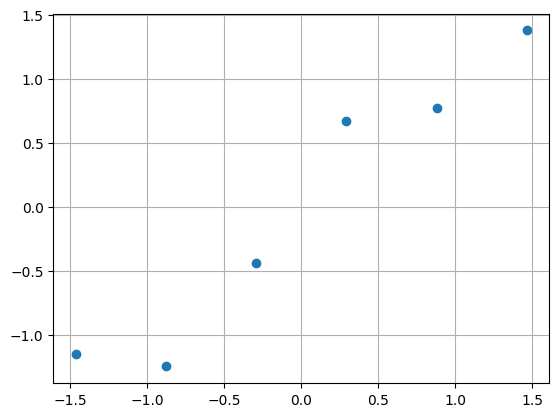

In [12]:
# Drawing scatter plot
plt.scatter(centered_data[:, 0], centered_data[:, 1])
plt.grid(True)
plt.show()

### step2. Covariance Matrix

In [13]:
# Calculation of covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)    # rowvar=False -> columns : variable, rows : sample
print(cov_matrix)

[[1.2        1.15799796]
 [1.15799796 1.2       ]]


### step 3. Eigen Value & Eigen Vector

In [15]:
# Calculation of eigen value, eigen vector
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print('Eigen Values')
print(eig_values)
print('\nEigen Vectors')
print(eig_vectors)

Eigen Values
[2.35799796 0.04200204]

Eigen Vectors
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


### step 4. Pincipal Component

In [23]:
# Principal Component
principal_component = eig_vectors[:, np.argmax(eig_values)]   # Finding eigen vector corresponding to index of maximum eigen value
print('principal component')
print(principal_component)

print('\ncentered data')
print(centered_data)
                #     (6*2)    @   (2*1) = (6*1)
projected_data = centered_data @ principal_component    # Data projection to the principal component direction
print('\nprojected data')
print(projected_data)   # dimension reduction : 2D -> 1D

principal component
[0.70710678 0.70710678]

centered data
[[-0.29277002 -0.43723732]
 [ 0.87831007  0.77357371]
 [ 0.29277002  0.67267279]
 [ 1.46385011  1.37897923]
 [-0.87831007 -1.24444467]
 [-1.46385011 -1.14354375]]

projected data
[-0.51619314  1.16805822  0.68267116  2.0101839  -1.50101427 -1.84370588]


### step 5. reconstructing the original data

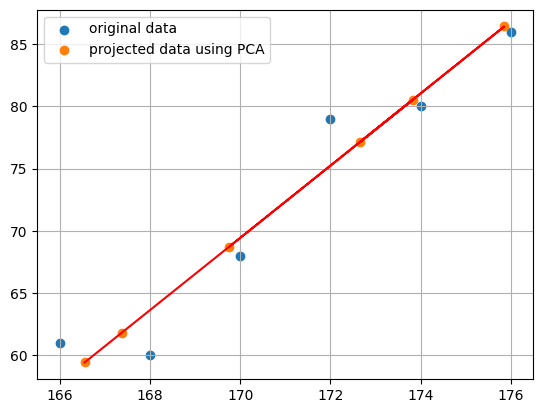

In [24]:
# PCA visualization
plt.scatter(x, y, label='original data')

pca_data_x = mean_data[0] + projected_data * principal_component[0] * stddev_data[0]    # transform from projected data to original coordinate(height)
pca_data_y = mean_data[1] + projected_data * principal_component[1] * stddev_data[1]    # transform from projected data to original coordinate(weight)
plt.scatter(pca_data_x, pca_data_y, label='projected data using PCA')
plt.plot(pca_data_x, pca_data_y, 'r-')

plt.grid(True)
plt.legend()
plt.show()